# Data Pre-processing

#### Understanding structure of data 
Identifying Continuous and Categorical data
Handling Missing data
Methods to identify outliers
Measuring centrality of data
Measuring spread of data

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import seaborn as sns
import datetime as dt
import random
import scipy.stats as stats
%matplotlib inline 
sns.set()
from pandas.api.types import CategoricalDtype
from plotnine import *
import datetime as dt
from datetime import timedelta
from statsmodels.tsa.api import Holt



In C:\Users\kamsi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kamsi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kamsi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\kamsi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\kamsi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

## Reading Data

In [2]:
df = pd.read_csv("Data/owid-covid-data.csv")

## Understanding structure of data

#### Looking at top 10 rows of data

In [3]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [4]:
df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
33407,NaN,NaN,International,2020-02-23,634.0,0.0,2.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33408,NaN,NaN,International,2020-02-24,691.0,57.0,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33409,NaN,NaN,International,2020-02-25,691.0,0.0,3.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33410,NaN,NaN,International,2020-02-26,691.0,0.0,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33411,NaN,NaN,International,2020-02-27,705.0,14.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33412,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33413,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33414,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33415,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33416,NaN,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Looking at all the variables and their types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33417 entries, 0 to 33416
Data columns (total 34 columns):
iso_code                           33353 non-null object
continent                          33141 non-null object
location                           33417 non-null object
date                               33417 non-null object
total_cases                        33062 non-null float64
new_cases                          33062 non-null float64
total_deaths                       33062 non-null float64
new_deaths                         33062 non-null float64
total_cases_per_million            32998 non-null float64
new_cases_per_million              32998 non-null float64
total_deaths_per_million           32998 non-null float64
new_deaths_per_million             32998 non-null float64
new_tests                          10401 non-null float64
total_tests                        10647 non-null float64
total_tests_per_thousand           10647 non-null float64
new_tests_per_thousand   

There are 33417 observations and 34 columns where 5 variables are of categorical data type and the remaining 29 variables are of numerical data types

#### The following is a list of names of variables in this data set


In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

#### Converting data types

In [7]:
df['date']= pd.to_datetime(df['date'])

#### Describing and Summarizing numerical or continuous variables

In [8]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,3.306200e+04,33062.000000,33062.000000,33062.00000,32998.000000,32998.000000,32998.000000,32998.000000,10401.000000,1.064700e+04,...,29919.000000,29708.000000,19865.000000,30083.000000,31104.000000,23877.000000,23591.000000,13764.000000,27353.000000,32951.000000
mean,5.091939e+04,1010.762809,2655.291634,39.93243,1103.657007,17.858746,40.909829,0.533204,16320.258341,7.689958e+05,...,5.990319,21546.066343,11.489011,249.517591,8.039533,10.990606,32.629508,53.246010,3.146980,74.244388
std,5.180225e+05,9309.139517,25233.329557,347.73264,2674.940362,62.928423,123.250689,3.006846,59168.420750,3.022411e+06,...,4.362110,20697.420278,18.736936,117.957827,4.116805,10.504692,13.328649,31.456423,2.549325,7.316460
min,0.000000e+00,-29726.000000,0.000000,-1918.00000,0.000000,-437.881000,0.000000,-41.023000,-3743.000000,1.000000e+00,...,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,2.100000e+01,0.000000,0.000000,0.00000,8.521500,0.000000,0.000000,0.000000,805.000000,2.585100e+04,...,2.162000,6171.884000,0.500000,153.493000,5.310000,1.900000,21.400000,22.863000,1.380000,70.390000
50%,4.460000e+02,5.000000,9.000000,0.00000,155.458000,0.773000,2.043000,0.000000,2766.000000,1.105140e+05,...,4.458000,15183.616000,1.700000,235.954000,7.110000,6.434000,31.400000,55.182000,2.540000,75.860000
75%,5.066500e+03,102.000000,107.000000,2.00000,936.628000,10.572000,21.692000,0.140000,9307.000000,4.324700e+05,...,9.720000,33132.320000,15.000000,318.949000,10.080000,19.600000,40.900000,83.741000,4.210000,80.100000
max,1.670892e+07,284710.000000,660123.000000,10512.00000,38138.741000,4944.376000,1237.551000,200.040000,929838.000000,5.063568e+07,...,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


In [9]:
# Taking a look at the outcome variable: 'total_deaths'
print(df['total_deaths'].value_counts())

0.0        10059
1.0         2053
2.0          972
3.0          805
5.0          595
           ...  
7921.0         1
6486.0         1
5476.0         1
3670.0         1
13354.0        1
Name: total_deaths, Length: 3778, dtype: int64


### Feature Selection
#### Dropping unnecessary and redundant numerical columns before analyzing data

In [10]:
df.isna().sum()

iso_code                              64
continent                            276
location                               0
date                                   0
total_cases                          355
new_cases                            355
total_deaths                         355
new_deaths                           355
total_cases_per_million              419
new_cases_per_million                419
total_deaths_per_million             419
new_deaths_per_million               419
new_tests                          23016
total_tests                        22770
total_tests_per_thousand           22770
new_tests_per_thousand             23016
new_tests_smoothed                 21897
new_tests_smoothed_per_thousand    21897
tests_units                        21129
stringency_index                    6287
population                            64
population_density                  1507
median_age                          3343
aged_65_older                       3779
aged_70_older   

There are a total number of 33417 observations and the following variables have more than 60% of data as missing values. 

new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, tests_units, 

and the variable "handwashing_facilities"  has 19653 close to 60% of data as missing values.

Therefore, these variables should be removed in order to avoid any bias in modeling. The variable extreme_poverty is also having 40% of its values as missing values. However, we will try to consider this variable as it has less than 50% of its missing values. 


In [11]:
df.drop(['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'handwashing_facilities'], axis = 1, inplace = True)

The below mentioned variables should also be removed as these are conversions per million. We would prefer to use per million numbers in general compared to just numbers, however, there are more missing values in variables using per million as conversions. Therefore, we stick to the original variables.

total_cases_per_million, new_cases_per_million, total_deaths_per_million, and new_deaths_per_million

In [12]:
df.drop(['total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million'], axis = 1, inplace = True)

Also, total cases should include new cases and total deaths should include new deaths, Therefore, we can remove new cases and new deaths from our data to avoid redundancy.

In [13]:
df.drop(['new_cases', 'new_deaths'], axis = 1, inplace = True)

Because Population Density is calculated using Population, we need to remove Population

In [14]:
df.drop(['population'], axis = 1, inplace = True)

#### Describing and Summarizing categorical variables

In [15]:
df.describe(include = 'O')

,iso_code,continent,location
count,33353,33141,33417
unique,211,6,212
top,VNM,Europe,Taiwan
freq,212,9113,212


#### Drop specific rows

Looking at the categorical variables. Some of the rows for iso_code has no values and corresponding continent also doesn't have any values. Also, the corresponding location has only "International" as the values. This means there is no way to track which location in these rows belongs to which continent and such. Therefore, we should remove these rows. There are only 64 such rows with no values in iso_code variables. Therefore, removing such a small data will not affect our model. 

In [16]:
df = df.dropna(how='all', subset=['iso_code'])
df.drop('iso_code', 1, inplace = True)

#### Looking at shape of new dataset 

We now have 33353 observations instead of 33417 observations and 19 variables instead of 34 variables.

In [17]:
df.shape

(33353, 18)

All the names of variables in our current data set are listed below

In [18]:
df.columns

Index(['continent', 'location', 'date', 'total_cases', 'total_deaths',
       'stringency_index', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy'],
      dtype='object')

## Graphical Exploratory Analysis

Before we go deeper into the dataset, it is good to perform some graphical exploratory analysis as we can quickly see and find issues with the data

#### GDP

C:\Users\kamsi\Anaconda3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_bin : Removed 3645 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


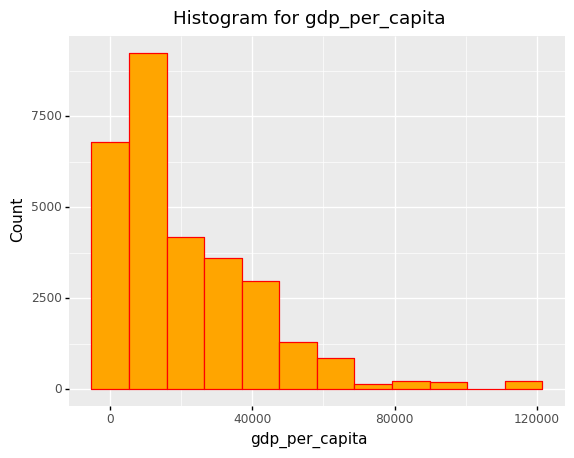

<ggplot: (-9223371931869117448)>

In [19]:
(ggplot(df, aes(x='gdp_per_capita'))   
 + geom_histogram(bins=12,
                 color ="red", 
                 fill ="orange")
 + labs(title="Histogram for gdp_per_capita", x="gdp_per_capita", y="Count")
)

#### Median Age

C:\Users\kamsi\Anaconda3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_bin : Removed 3279 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


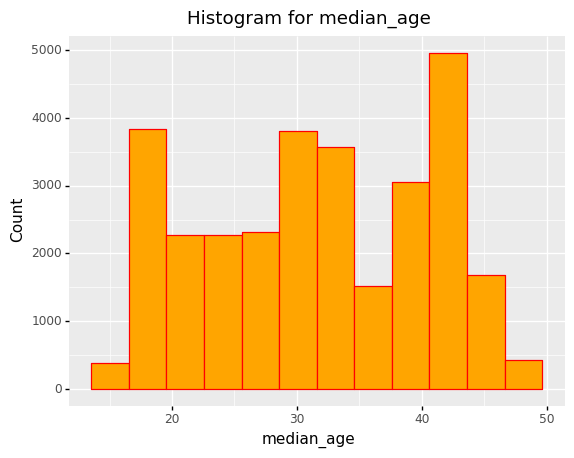

<ggplot: (-9223371931869052492)>

In [20]:
(ggplot(df, aes(x='median_age'))   
 + geom_histogram(bins=12,
                 color ="red", 
                 fill ="orange")
 + labs(title="Histogram for median_age", x="median_age", y="Count")
)

#### Number of Cases vs Deaths

Text(0.5, 1.0, 'Total Number of Cases vs Total Deaths')

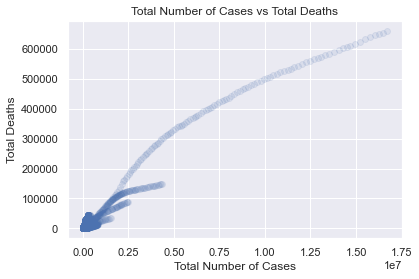

In [21]:
plt.scatter(df['total_cases'], df['total_deaths'], alpha = 0.1)
plt.xlabel("Total Number of Cases")
plt.ylabel("Total Deaths")
plt.title("Total Number of Cases vs Total Deaths")

#### Distribution of all Numerical Variables

C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matpl

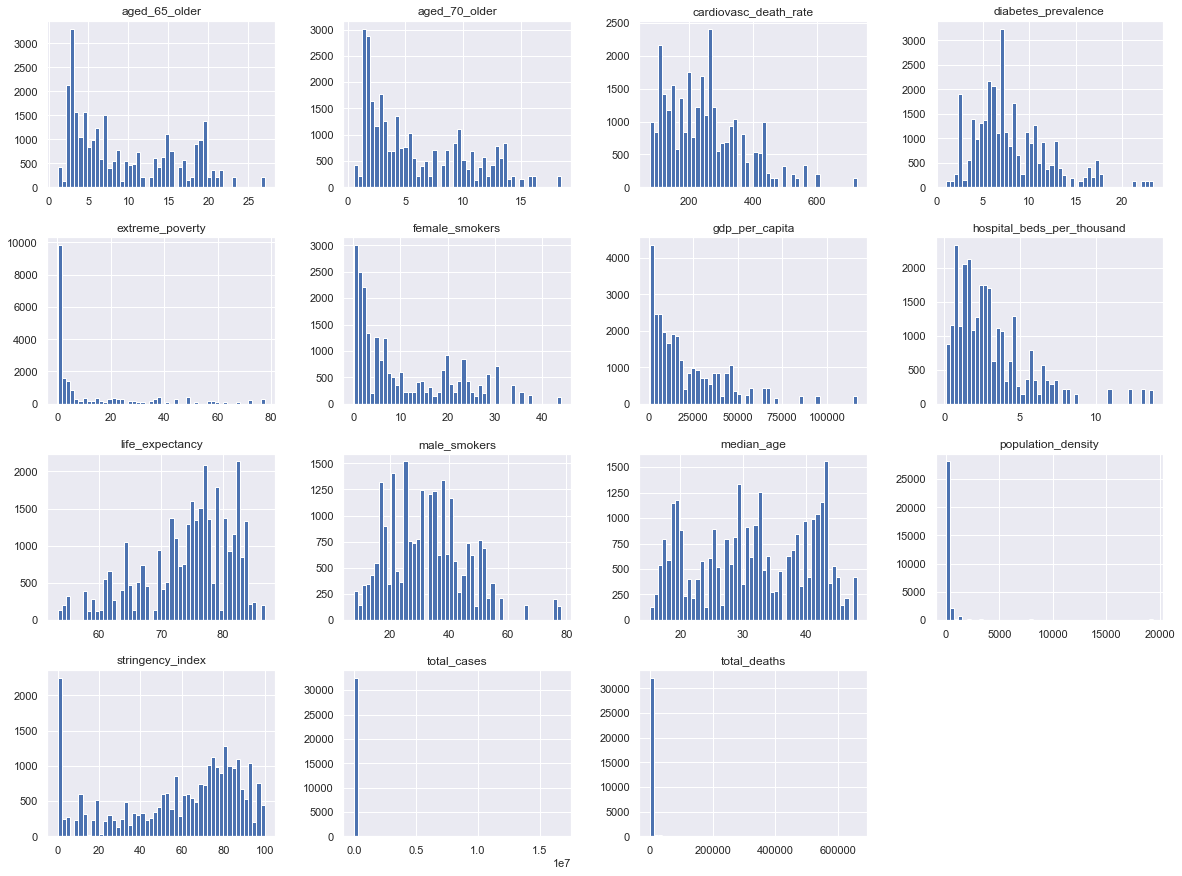

In [22]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

## Handling Missing Values

In [23]:
df.isnull().sum()

continent                       212
location                          0
date                              0
total_cases                     355
total_deaths                    355
stringency_index               6223
population_density             1443
median_age                     3279
aged_65_older                  3715
aged_70_older                  3434
gdp_per_capita                 3645
extreme_poverty               13488
cardiovasc_death_rate          3270
diabetes_prevalence            2249
female_smokers                 9476
male_smokers                   9762
hospital_beds_per_thousand     6000
life_expectancy                 402
dtype: int64

As seen from above df.isnull().sum(), there are several missing values in this dataset. Therefore, we first need to handle these missing values in numerical variables before proceeding further. We will use SimpleImputer for this.

In [24]:
columns = ['total_cases', 'total_deaths', 'stringency_index', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy']
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df[columns])
df1 = pd.DataFrame(data=imputer.transform(df[columns]) , columns=df[columns].columns)

In [25]:
df = df[['continent', 'location', 'date']]
df['tmp'] = 1
df1['tmp'] = 1

df = pd.concat([df, df1], axis=1, join='inner')
df = df.drop('tmp', axis=1)

C:\Users\kamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df.head()

,continent,location,date,total_cases,total_deaths,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
0,Asia,Afghanistan,2019-12-31,0.0,0.0,67.59,54.422,18.6,2.581,1.337,1803.987,1.7,597.029,9.59,6.434,31.4,0.5,64.83
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.00,54.422,18.6,2.581,1.337,1803.987,1.7,597.029,9.59,6.434,31.4,0.5,64.83
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.00,54.422,18.6,2.581,1.337,1803.987,1.7,597.029,9.59,6.434,31.4,0.5,64.83
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.00,54.422,18.6,2.581,1.337,1803.987,1.7,597.029,9.59,6.434,31.4,0.5,64.83
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.00,54.422,18.6,2.581,1.337,1803.987,1.7,597.029,9.59,6.434,31.4,0.5,64.83


C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matpl

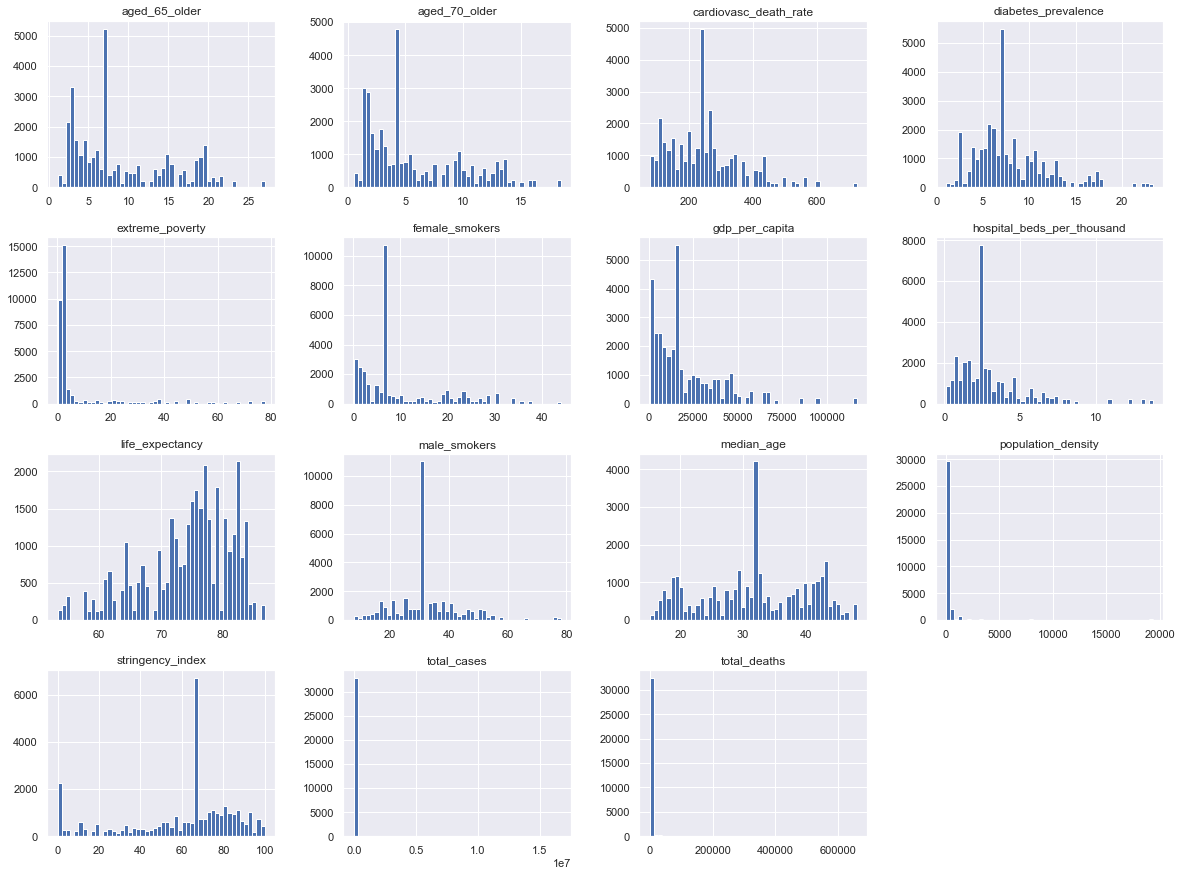

In [27]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

## Analysis for Daily Cases

In [28]:
datewise = df.groupby(["date"]).agg({"total_cases" : "sum", "total_deaths" : "sum"})

In [29]:
print("Total Number of Cases: ", datewise["total_cases"].iloc[-1])
print("Total Number of Deaths: ", datewise["total_deaths"].iloc[-1])
print("Total Number of Active Cases ", (datewise["total_cases"].iloc[-1] - datewise["total_deaths"].iloc[-1]))

Total Number of Cases:  33136534.0
Total Number of Deaths:  1291803.0
Total Number of Active Cases  31844731.0


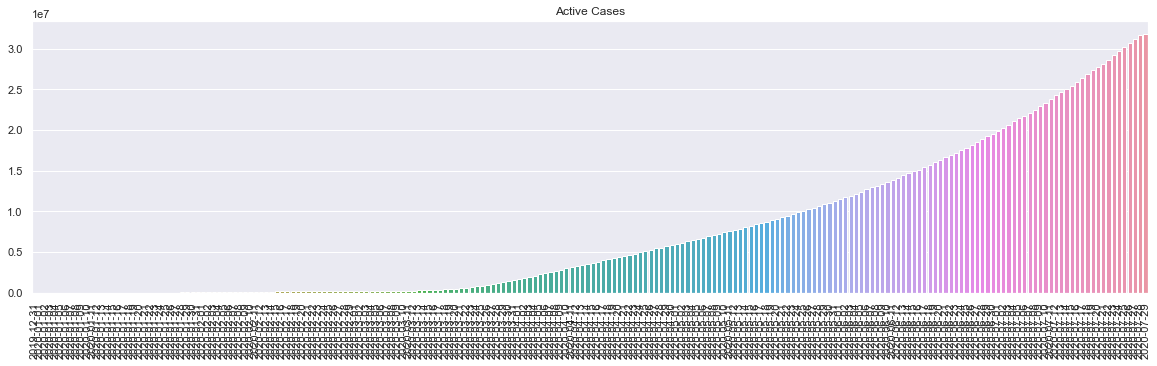

In [30]:
plt.figure(figsize = (20, 5))
sns.barplot(x = datewise.index.date, y = datewise["total_cases"] - datewise["total_deaths"])
plt.title("Active Cases")
plt.xticks(rotation = 90)
plt.show()

Sadly, but as expected, the number of cases have been increasing as can be seen from the above plot.

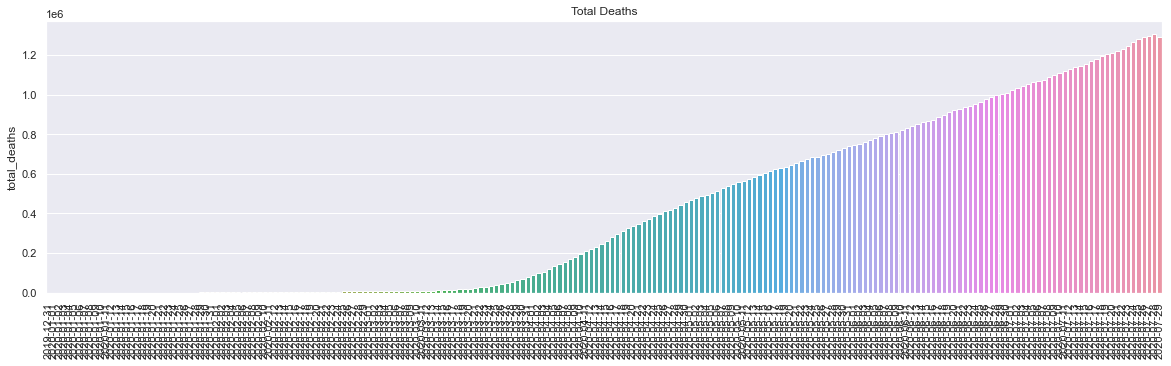

In [31]:
plt.figure(figsize = (20, 5))
sns.barplot(x = datewise.index.date, y = datewise["total_deaths"])
plt.title("Total Deaths")
plt.xticks(rotation = 90)
plt.show()

And we also have increasing number of deaths

## Analysis for Weekly Cases

Text(0.5, 1.0, 'Weekly Analysis of Cases')

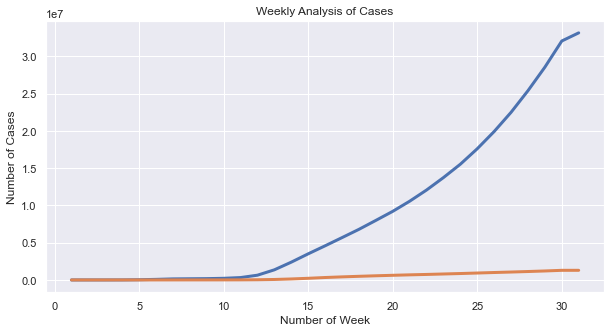

In [32]:
datewise["WeekofYear"] = datewise.index.weekofyear
num_week = []
weekly_cases = []
weekly_deaths = []

w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekly_cases.append(datewise[datewise["WeekofYear"] == i]["total_cases"].iloc[-1])
    weekly_deaths.append(datewise[datewise["WeekofYear"] == i]["total_deaths"].iloc[-1])    
    num_week.append(w)
    w = w+1
    
plt.figure(figsize = (10, 5))
plt.plot(num_week, weekly_cases, label = "Weekly Cases", linewidth = 3)
plt.plot(num_week, weekly_deaths, label = "Weekly Deaths", linewidth = 3)
plt.xlabel("Number of Week")
plt.ylabel("Number of Cases")
plt.title("Weekly Analysis of Cases")

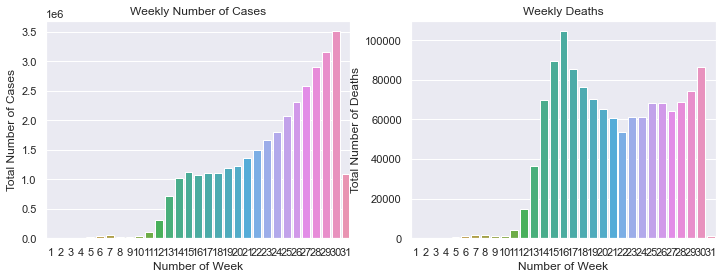

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
sns.barplot(x = num_week, y = pd.Series(weekly_cases).diff().fillna(0), ax = ax1)
sns.barplot(x = num_week, y = pd.Series(weekly_deaths).diff().fillna(0), ax = ax2)
ax1.set_xlabel("Number of Week")
ax2.set_xlabel("Number of Week")
ax1.set_ylabel("Total Number of Cases")
ax2.set_ylabel("Total Number of Deaths")
ax1.set_title("Weekly Number of Cases")
ax2.set_title("Weekly Deaths")
plt.show()

Average number of cases increasing everyday:  156304.0
Average number of deaths increasing everyday:  6093.0


C:\Users\kamsi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


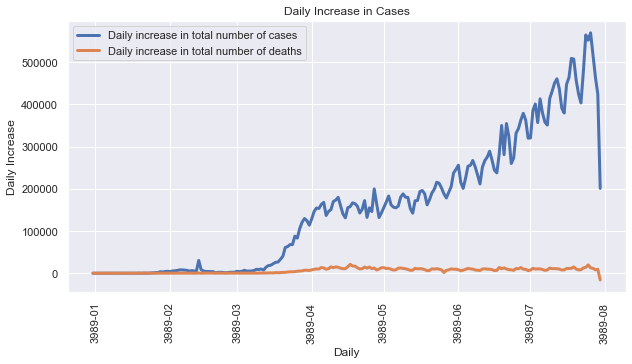

In [34]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
print("Average number of cases increasing everyday: ", np.round(datewise["total_cases"].diff().fillna(0).mean()))
print("Average number of deaths increasing everyday: ", np.round(datewise["total_deaths"].diff().fillna(0).mean()))

plt.figure(figsize = (10, 5))
plt.plot(datewise["total_cases"].diff().fillna(0), label = "Daily increase in total number of cases", linewidth = 3)
plt.plot(datewise["total_deaths"].diff().fillna(0), label = "Daily increase in total number of deaths", linewidth = 3)
plt.xlabel("Daily")
plt.ylabel("Daily Increase")
plt.title("Daily Increase in Cases")
plt.legend()
plt.xticks(rotation = 90)
plt.show()

## Analysis by Continent

### Number of Observations per Continent

In [35]:
df.groupby('continent').size()

continent
Africa           7479
Asia             8274
Europe           9113
North America    5047
Oceania          1253
South America    1975
dtype: int64

<AxesSubplot:xlabel='continent', ylabel='count'>

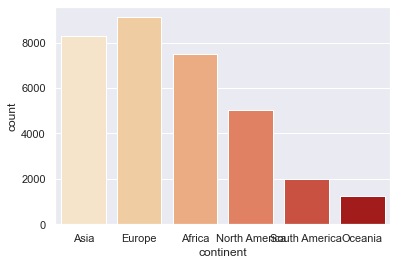

In [36]:
sns.countplot(x='continent',data=df, palette="OrRd")

The above graph shows that Europe has majority number of observations in the data

### Exploring Total Number of Cases and Total Number of Deaths by Continent

In [37]:
by_continent = df[df["date"] == df['date'].max()].groupby(["continent"]).agg({"total_cases" : "sum", "total_deaths" : "sum", "gdp_per_capita" : "sum", "population_density" : "sum"})

In [38]:
by_continent["deaths %"] = (by_continent["total_deaths"]/by_continent["total_cases"])*100

In [39]:
by_continent.head()

,total_cases,total_deaths,gdp_per_capita,population_density,deaths %
continent,,,,,
Africa,873331.0,18471.0,318890.600,5666.444,2.115006
Asia,4053864.0,92728.0,1006523.217,19763.506,2.287398
Europe,2495240.0,173495.0,1503526.155,30260.613,6.953039
North America,5146329.0,209663.0,721344.124,9200.679,4.074030
Oceania,17078.0,197.0,153995.186,605.862,1.153531


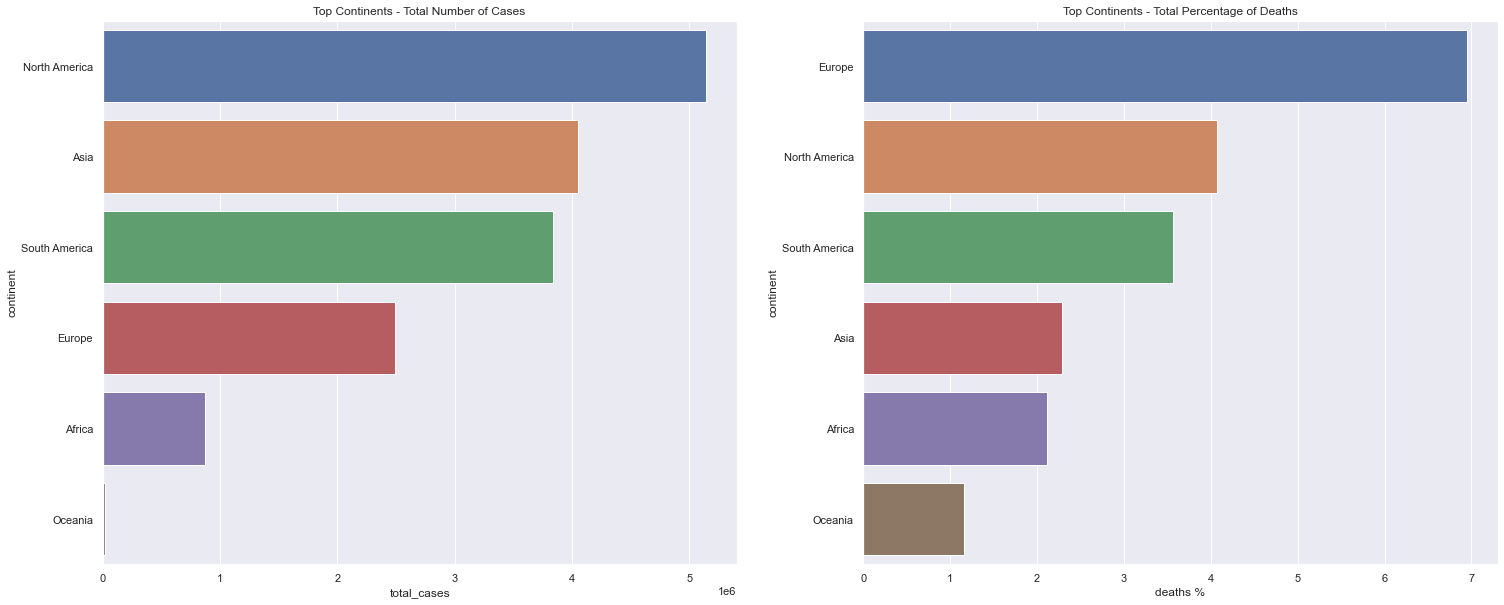

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
top_total_cases = by_continent.sort_values(["total_cases"], ascending = False).head(10)
top_total_deaths = by_continent.sort_values(["deaths %"], ascending = False).head(10)
sns.barplot(x = top_total_cases["total_cases"], y = top_total_cases.index, ax = ax1)
ax1.set_title("Top Continents - Total Number of Cases")
sns.barplot(x = top_total_deaths["deaths %"], y = top_total_deaths.index, ax = ax2)
ax2.set_title("Top Continents - Total Percentage of Deaths")

plt.show()

From the above charts, it is clearly seen that North America has the highest number of cases and second highest percentage of deaths. South America ranks number third in total number of cases and in total percentage of deaths. Surprisingly, Asia has second highest number of cases and less percentage of deaths (only 2.2%). This might be due to several factors. But One of thge reasons can be the inaccuracy in reporting the number of cases/deaths and another reason can be their stronger immune system. Europe also surprisingly has very less number of cases, but ranks number one in total percentage of deaths. Again, there can be several factors associated with this, however, one reason can be Europe is not taking as good of a precaution as some other continents.

### Exploring Continents by GDP

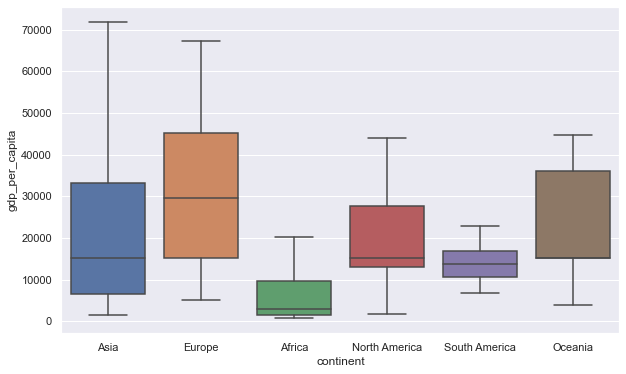

In [41]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="gdp_per_capita", data=df, showfliers=False)

### Exploring population density per continent

The below chart shows that the population density is highest in North America followed by Asia, Europe, Africa, Oceana, and last South America. Therefore, even though Europe seem to have highest number of deaths and North America among the least number of deaths, it is important to consider that North America has higher population density compared to Europe.  

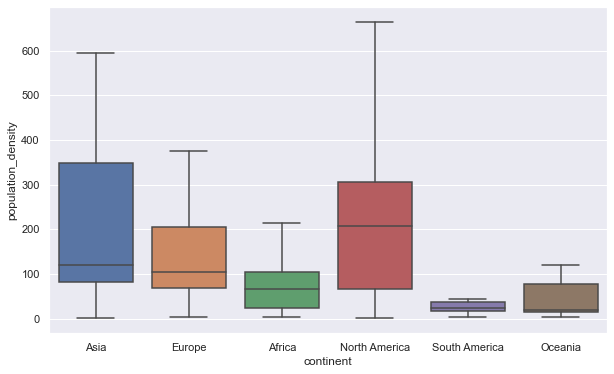

In [42]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="population_density", data=df, showfliers=False)

The above two boxplots show that Europe and Oceana are richest continents of all. Oceana has least population density from below chart and that's probably why less number of cases leading to lesser number of deaths. However, Europe on the other hand, is among the richest continents, ranks number third in population density and ranks 4th in total number of cases, and still has the highest number of total deaths. So, it will be interesting to study Europe among all the continents and help them predict total number of deaths ahead of time. This will help Europe in managing the situation better to some extent.

### Studying Europe

In [43]:
df = df[df['continent'] == "Europe"]
df = df.drop("continent", axis=1)

df.head()

,location,date,total_cases,total_deaths,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
202,Albania,2020-03-09,2.0,0.0,36.11,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57
203,Albania,2020-03-10,6.0,0.0,41.67,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57
204,Albania,2020-03-11,10.0,0.0,51.85,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57
205,Albania,2020-03-12,11.0,1.0,51.85,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57
206,Albania,2020-03-13,23.0,1.0,78.70,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57


In [44]:
datewise_europe = df.groupby(["date"]).agg({"total_cases" : "sum", "total_deaths" : "sum"})

In [45]:
print("Total Number of Cases in Europe: ", datewise_europe["total_cases"].iloc[-1])
print("Total Number of Deaths in Europe: ", datewise_europe["total_deaths"].iloc[-1])
print("Total Number of Active Cases in Europe ", (datewise_europe["total_cases"].iloc[-1] - datewise_europe["total_deaths"].iloc[-1]))

Total Number of Cases in Europe:  2495240.0
Total Number of Deaths in Europe:  173495.0
Total Number of Active Cases in Europe  2321745.0


### Exploring the regions within Europe

<AxesSubplot:xlabel='location', ylabel='count'>

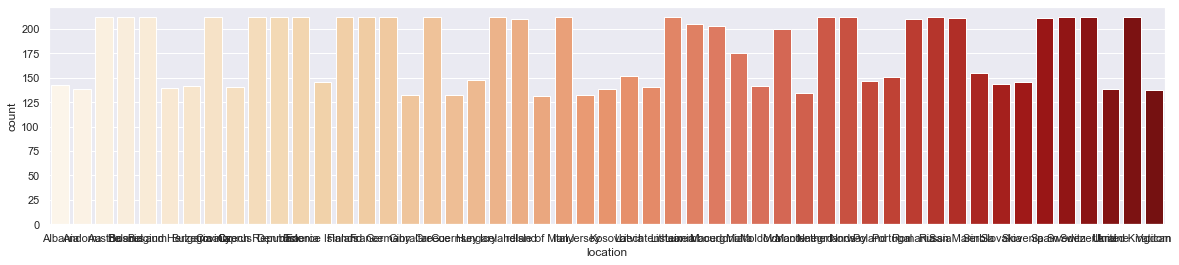

In [46]:
plt.figure(figsize=(20,4))
sns.countplot(x ='location',data=df, palette="OrRd")

In [47]:
by_location = df[df["date"] == df['date'].max()].groupby(["location"]).agg({"total_cases" : "sum", "total_deaths" : "sum"}).sort_values(["total_cases"], ascending = False)

In [48]:
by_location.head()

,total_cases,total_deaths
location,,
Russia,823515.0,13504.0
United Kingdom,300692.0,45878.0
Italy,246488.0,35123.0
Germany,206926.0,9128.0
France,183804.0,30223.0


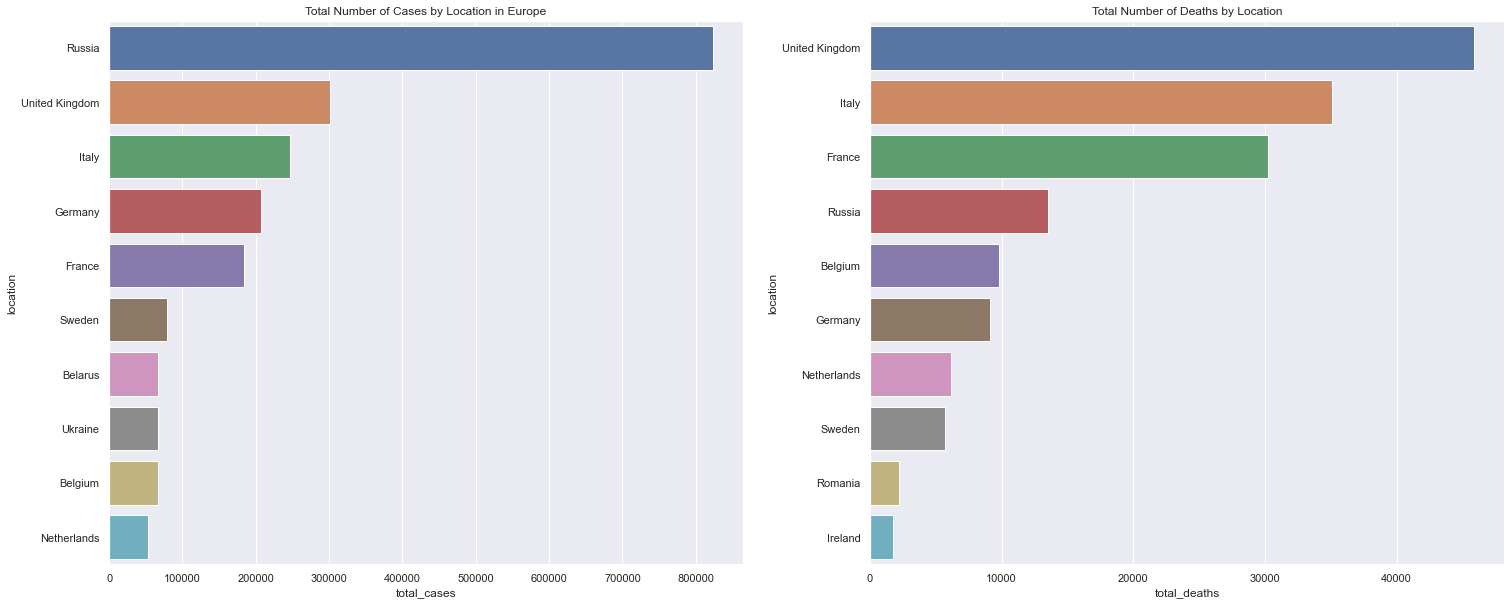

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
loc_cases = by_location.sort_values(["total_cases"], ascending = False).head(10)
loc_deaths = by_location.sort_values(["total_deaths"], ascending = False).head(10)
sns.barplot(x = loc_cases["total_cases"], y = loc_cases.index, ax = ax1)
ax1.set_title("Total Number of Cases by Location in Europe")
sns.barplot(x = loc_deaths["total_deaths"], y = loc_deaths.index, ax = ax2)
ax2.set_title("Total Number of Deaths by Location")

plt.show()

The above results show that Russia has the highest number of cases. However, Russia is also a part of Asia and therefore, we would like to study United Kingdom which seems to have the highest number of cases in Europe. United Kingdom also has the highest number of deaths.

### Studying United Kingdom

In [50]:
df = df[df['location'] == "United Kingdom"]
df.drop(["location"], axis=1, inplace = True)

df.head()

,date,total_cases,total_deaths,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
31362,2019-12-31,0.0,0.0,67.59,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
31363,2020-01-01,0.0,0.0,0.00,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
31364,2020-01-02,0.0,0.0,0.00,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
31365,2020-01-03,0.0,0.0,0.00,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32
31366,2020-01-04,0.0,0.0,0.00,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,2.54,81.32


In [51]:
uk = df.groupby(["date"]).agg({"total_cases" : "sum", "total_deaths" : "sum"})

In [52]:
print("Total Number of Cases in United Kingdom: ", uk["total_cases"].iloc[-1])
print("Total Number of Deaths in United Kingdom: ", uk["total_deaths"].iloc[-1])
print("Total Number of Active Cases in United Kingdom ", (uk["total_cases"].iloc[-1] - uk["total_deaths"].iloc[-1]))

Total Number of Cases in United Kingdom:  300692.0
Total Number of Deaths in United Kingdom:  45878.0
Total Number of Active Cases in United Kingdom  254814.0


#### Weekly Analysis for United Kingdom

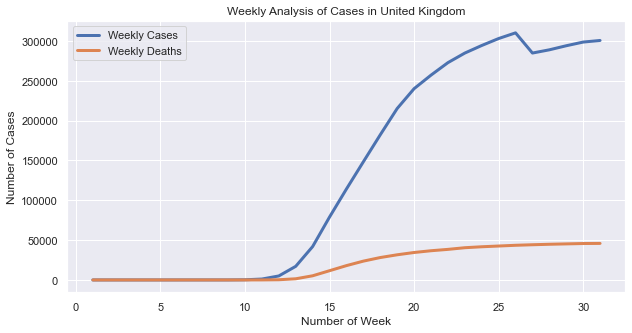

In [53]:
uk["WeekofYear"] = uk.index.weekofyear
num_week_uk = []
weekly_cases_uk = []
weekly_deaths_uk = []

w = 1
for i in list(uk["WeekofYear"].unique()):
    weekly_cases_uk.append(uk[uk["WeekofYear"] == i]["total_cases"].iloc[-1])
    weekly_deaths_uk.append(uk[uk["WeekofYear"] == i]["total_deaths"].iloc[-1])    
    num_week_uk.append(w)
    w = w+1
    
plt.figure(figsize = (10, 5))
plt.plot(num_week_uk, weekly_cases_uk, label = "Weekly Cases", linewidth = 3)
plt.plot(num_week_uk, weekly_deaths_uk, label = "Weekly Deaths", linewidth = 3)
plt.xlabel("Number of Week")
plt.ylabel("Number of Cases")
plt.title("Weekly Analysis of Cases in United Kingdom")
plt.legend()
plt.show()

### Linear Regression

#### Training - Validating Model

In [54]:
uk["Days Since"] = uk.index - uk.index[0]
uk["Days Since"] = uk["Days Since"].dt.days
train_ml = uk.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = uk.iloc[:int(datewise.shape[0]*0.95):]

In [55]:
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1, 1), np.array(train_ml["total_deaths"]).reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [56]:
valid_pred = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [57]:
new_date = []
new_pred = []
for i in range(1, 18):
    new_date.append(uk.index[-1] + timedelta(days = i))
    new_pred.append(lin_reg.predict(np.array(uk["Days Since"].max() + i).reshape(-1,1))[0][0])
pd.set_option("display.float_format", lambda x: '%.f' % x)
model_predictions = pd.DataFrame(zip(new_date, new_pred), columns = ["Dates", "Regression Results"])
model_predictions.head()

,Dates,Regression Results
0,2020-07-30,50962
1,2020-07-31,51260
2,2020-08-01,51558
3,2020-08-02,51857
4,2020-08-03,52155


Linear Regression model performs well and the below table shows the prediction of total deaths.

### Time Series 
We also would like to see how time series forecasting would work with this data

In [58]:
model_train = uk.iloc[:int(uk.shape[0]*0.85)]
model_valid = uk.iloc[:int(uk.shape[0]*0.85):]

In [59]:
holt = Holt(np.asarray(model_train["total_deaths"])).fit(smoothing_level = 1.4, smoothing_slope = 0.2)
y_pred = model_valid.copy()
y_pred["Holt"] = holt.forecast(len(model_valid))

In [60]:
holt_new_date = []
holt_new_pred = []
for i in range(1, 18):
    holt_new_date.append(uk.index[-1] + timedelta(days = i))
    holt_new_pred.append(holt.forecast((len(model_valid)+i))[-1])

model_predictions["Holt's Predictions"] = holt_new_pred
model_predictions.head()


,Dates,Regression Results,Holt's Predictions
0,2020-07-30,50962,71481
1,2020-07-31,51260,71636
2,2020-08-01,51558,71791
3,2020-08-02,51857,71946
4,2020-08-03,52155,72101


Based on the above results, linear regression model is performing better in predicting the total number of deaths. 